Iago Caran Aquino - 198921

Olá, estou tentando escrever texto dentro do Jupiter.
Abaixo está um código básico de como fazemos uma simulação.

In [48]:
%matplotlib inline
from pylab import *
import numpy as np
import random

# Ao longo do programa seguimos algumas convenções:
#  - 0 : nenhum prêmio
#  - 1 : prêmio

# Trocar de porta?
troca = False

# Colocar o prêmio atrás de uma porta
doors = [0, 0, 0]
prize = random.randint(0, 2)
doors[prize] = 1

print('Portas:', doors)
print('Porta com prêmio:', prize)

# Escolher uma porta
chosen = random.randint(0, 2)
discarded = None
print('Porta escolhida:', chosen)

# Abrir uma porta
for i in range(0, 3):
    if doors[i] == 0 and i != chosen:
        discarded = i
        break

print('Porta descartada:', discarded)
        
# Trocar de porta
if troca:
    print('Trocou')
    for i in range(0, 3):
        if i not in [chosen, discarded]:
            chosen = i
            break
else:
    print('Não trocou')

# Resultado
print('Ganhou' if doors[chosen] == 1 else 'Perdeu')

Portas: [0, 1, 0]
Porta com prêmio: 1
Porta escolhida: 1
Porta descartada: 0
Não trocou
Ganhou


Transformando em uma função, podemos repetir isso várias vezes.

In [49]:
def simula(troca = False):
    doors = [0, 0, 0]
    doors[random.randint(0, 2)] = 1
    chosen = random.randint(0, 2)
    discarded = None

    for i in range(0, 3):
        if doors[i] == 0 and i != chosen:
            discarded = i
            break
    if troca:
        for i in range(0, 3):
            if i not in [chosen, discarded]:
                chosen = i
                break
    return doors[chosen] == 1

Executando essa função, podemos fazer o teste para troca ou não:

In [50]:
print('Trocando:', 'Ganhou' if simula(False) == 1 else 'Perdeu')
print('Sem trocar:', 'Ganhou' if simula(True) == 1 else 'Perdeu')

Trocando: Perdeu
Sem trocar: Ganhou


Simulando várias vezes:

In [61]:
# Sem troca
semTroca = [0]
soma = 0
size = 2500
for i in range(1, size + 1):
    soma += simula(False)
    semTroca.append(soma / i)

# Com troca
soma = 0
comTroca = [0]
for i in range(1, size + 1):
    soma += simula(True)
    comTroca.append(soma / i)

Plotando graficamente:

Obs.: A linha vermelha demarca o valor 0.333

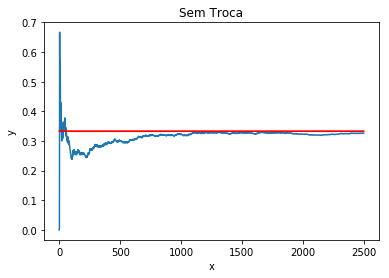

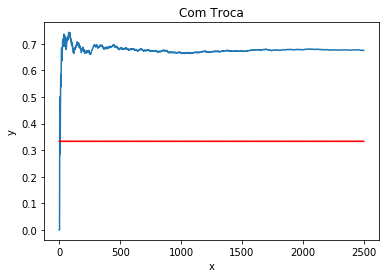

In [62]:
x = np.linspace(0, size, size)

figure()
plot(semTroca)
plot(x, [1 / 3] * size, 'r.-', markersize=0.1)
xlabel('x')
ylabel('y')
title('Sem Troca')
show()

figure()
plot(comTroca)
plot(x, [1 / 3] * size, 'r.-', markersize=0.1)
xlabel('x')
ylabel('y')
title('Com Troca')
show()
